# 📊 Vibration Feature Extraction and EDA
This notebook loads the implement usage summary and performs basic EDA and anomaly checks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load implement usage summary
df = pd.read_csv('../data_pipeline/implement_usage_summary.csv')
df['Start'] = pd.to_datetime(df['Start'])
df['Stop'] = pd.to_datetime(df['Stop'])
df['Duration_min'] = df['Duration_sec'] / 60

df.head()

,Start,Stop,Duration_sec,Duration_min
0,2025-05-29 14:51:53.812107,NaT,NaN,NaN
1,2025-05-29 14:53:53.812107,2025-05-29 14:52:53.812107,-60.0,-1.0
2,2025-05-29 14:55:53.812107,2025-05-29 14:54:53.812107,-60.0,-1.0
3,2025-05-29 14:57:53.812107,2025-05-29 14:56:53.812107,-60.0,-1.0
4,2025-05-29 14:59:53.812107,2025-05-29 14:58:53.812107,-60.0,-1.0


## 📈 Distribution of Implement Usage Durations

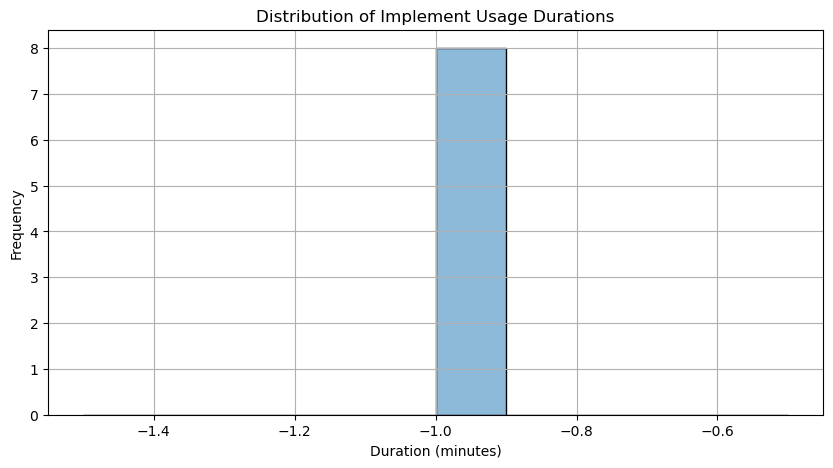

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Duration_min'], bins=10, kde=True)
plt.title("Distribution of Implement Usage Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## ⚠️ Detect Potential Anomalies (Too Short or Too Long Events)

In [4]:
# Define thresholds
min_threshold = 0.5  # minimum 30 seconds
max_threshold = 10   # maximum 10 minutes

anomalies = df[(df['Duration_min'] < min_threshold) | (df['Duration_min'] > max_threshold)]
anomalies

,Start,Stop,Duration_sec,Duration_min
1,2025-05-29 14:53:53.812107,2025-05-29 14:52:53.812107,-60.0,-1.0
2,2025-05-29 14:55:53.812107,2025-05-29 14:54:53.812107,-60.0,-1.0
3,2025-05-29 14:57:53.812107,2025-05-29 14:56:53.812107,-60.0,-1.0
4,2025-05-29 14:59:53.812107,2025-05-29 14:58:53.812107,-60.0,-1.0
5,2025-05-29 15:01:53.812107,2025-05-29 15:00:53.812107,-60.0,-1.0
6,2025-05-29 15:03:53.812107,2025-05-29 15:02:53.812107,-60.0,-1.0
7,2025-05-29 15:05:53.812107,2025-05-29 15:04:53.812107,-60.0,-1.0
8,2025-05-29 15:07:53.812107,2025-05-29 15:06:53.812107,-60.0,-1.0


## ✅ Summary Statistics

In [5]:
df['Duration_min'].describe()

count    8.0
mean    -1.0
std      0.0
min     -1.0
25%     -1.0
50%     -1.0
75%     -1.0
max     -1.0
Name: Duration_min, dtype: float64